In [1]:
import pandas as pd
file_training_set = (r"C:\Users\katuwawalaai\Disorder_Super\Consensus_Modelling\TrainingSet_Featuers(942_54).csv")
TrainingSet = pd.read_csv(file_training_set)
TrainingSet.head()

,Unnamed: 0,Spot_PredictionScore,Spot_BinaryPredictions,Spot_Prediction_ScoreWindow,Spot_Prediction_ScoreWindowWeighted,Spot_Prediction_ScoreWindowDiff,Spot_Binary_PredictionWindow,Spot_Binary_PredictionWindowWeighted,Spot_Binary_PredictionWindowDiff,Spot_Prediction_Score_Up,...,New_Score3Window,New_Score3WindowWeighted,New_Score3WindowDiff,New_Binary1,New_Binary1Window,New_Binary1WindowWeighted,New_Binary1WindowDiff,Terminal_Distance,Terminal_Distance10,Disorder_Annotation
0,0,0.887173,1,0.870330,0.147062,0.738924,1.000000,0.166667,0.4,0.887173,...,0.171882,0.029086,0.134295,0,0.0,0.0,0.0,0.000000,0,1
1,1,0.912274,1,0.859450,0.126894,0.718773,1.000000,0.142857,0.2,0.887173,...,0.175502,0.023128,0.116780,0,0.0,0.0,0.0,0.009524,1,1
2,2,0.896730,1,0.846322,0.108908,0.704024,1.000000,0.125000,0.0,0.912274,...,0.173860,0.022140,0.105836,0,0.0,0.0,0.0,0.019048,2,1
3,3,0.854527,1,0.833087,0.093950,0.698903,0.888889,0.105556,0.0,0.896730,...,0.166102,0.020059,0.107216,0,0.0,0.0,0.0,0.028571,3,1
4,4,0.848592,1,0.822364,0.083305,0.694014,0.800000,0.089000,0.0,0.854527,...,0.160606,0.016245,0.110341,0,0.0,0.0,0.0,0.038095,4,1


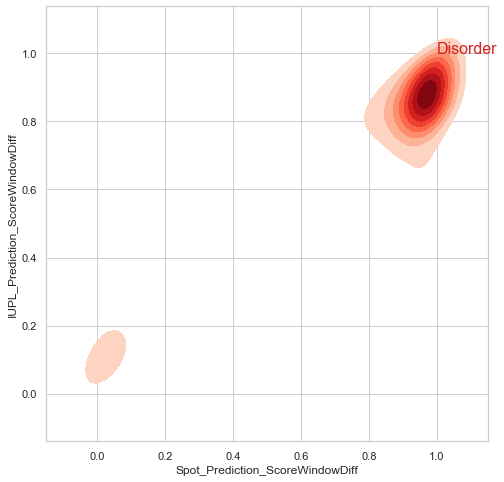

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Subset the  dataset by Label
Disorder= TrainingSet.query('Disorder_Annotation==1')
Order= TrainingSet.query('Disorder_Annotation==0') 
# Set up the figure
f, ax = plt.subplots(figsize=(8,8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(Disorder.Spot_Prediction_ScoreWindowDiff, Disorder.IUPL_Prediction_ScoreWindowDiff,
                 cmap="Reds", shade=True, shade_lowest=False)
#ax = sns.kdeplot(Order.Spot_Prediction_ScoreWindowDiff, Order.IUPL_Prediction_ScoreWindowDiff,
#                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
#blue = sns.color_palette("Blues")[-2]
ax.text(1.0, 1.0, "Disorder", size=16, color=red)
#ax.text(0.1, 0.1, "Order", size=16, color=blue)
plt.savefig('Two_Scores_D.tiff', bbox_inches='tight',quality =95,orientation ='landscape',dpi =800)
plt.show()

In [26]:
Spot_ScoreWindowDiff = list(TrainingSet.loc[:,('Spot_Prediction_ScoreWindowDiff')].values)
Consensus_ScoreWindowDiff= list(TrainingSet.loc[:,('Consensus_ScoreWindowDiff')].values)
y=list(TrainingSet.loc[:,('Disorder_Annotation')].values)

In [59]:
Mod_Score=[]
b=0
for b in range(0,len(Spot_ScoreWindowDiff),1):
                if Spot_ScoreWindowDiff[b]<0.4 and Consensus_ScoreWindowDiff[b]<0.4:Mod_Score.append(0.2)
                elif Spot_ScoreWindowDiff[b]>0.6 and Consensus_ScoreWindowDiff[b]>0.6:Mod_Score.append(0.9)
                else:Mod_Score.append(0.5)

In [31]:
len(Spot_ScoreWindowDiff)

412380

In [32]:
len(Mod_Score)

412380

In [58]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, average_precision_score, confusion_matrix
roc_auc_score(y, Mod_Score)

0.8054598392389731